# Introduction

It wasn't until 1999 that the euro really began its journey, when 11 countries (Austria, Belgium, Finland, France, Germany, Ireland, Italy, Luxembourg, the Netherlands, Portugal and Spain) fixed their exchange rates and created a new currency with monetary policy passed to the European Central Bank. Today euro is 20+ years old.

Currently, the euro (€) is the official currency of 19 out of 27 EU member countries which together constitute the Eurozone, officially called the euro area.
* Euro area member countries  
Although all EU countries are part of the Economic and Monetary Union (EMU), 19 of them have replaced their national currencies with the single currency – the euro. These EU countries form the euro area, also known as the eurozone: **Austria, Belgium, Cyprus, Estonia, Finland, France, Germany, Greece, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, the Netherlands, Portugal, Slovakia, Slovenia, Spain**.
* Non-euro area member countries  
These are countries where the euro has still not been adopted, but who will join once they have met the necessary conditions. Mostly, it consists of countries of member states which acceded to the Union in 2004, 2007 and 2013, after the euro was launched in 2002: **Bulgaria, Croatia, Czech Republic, Hungary, Poland, Romania, Sweden**.
* Member countries with an opt-out  
Occasionally, member states can negotiate an opt-out from any of the European Union legislation or treaties, and agree to not participate in certain policy areas. Concerning the single currency, this is the case for Denmark. It kept its former currency after becoming member of the EU. This list includes only **Denmark**.
* Outside the EU  
The euro is also the sole currency of **Montenegro** and **Kosovo**.  

source: [Which countries use the euro?](https://europa.eu/european-union/about-eu/euro/which-countries-use-euro_en)

Watch short video about Euro history before we start exploratory analysis:

# History of Euro vs Polish Zloty [ANIMATED!]
In this notebook we are going to study the history of the Euro vs Polish Zloty using our generated plot. 

There are 7 interesting highlights in the history of the Euro let's take a look at them:
* 1- The currency was introduced in non-physical form (traveller's cheques, electronic transfers, banking, etc.) at midnight on 1 January 1999 [[source]](https://en.wikipedia.org/wiki/History_of_the_euro#Launch)
* 2- Transition from national legacy currencies to euro 2002 [[source]](https://en.wikipedia.org/wiki/History_of_the_euro#Aftermath)
* 3- Global financial crisis 2008 [[source]](https://en.wikipedia.org/wiki/History_of_the_euro#Recession_era)
* 4- Greek Crisis 2010 [[source]](https://www.thebalance.com/what-is-the-greece-debt-crisis-3305525#:~:text=Why%20Greece%20Didn't%20Leave%20the%20Eurozone&text=Without%20the%20austerity%20measures%2C%20the,lowered%20its%20euro%20exchange%20rate.)
* 5- Poland become a member of the European Union [[source]](https://en.wikipedia.org/wiki/Treaty_of_Accession_2003)
* 6- Euro plunging for many reasons Much of has been about the strength of the Dollar 2014. [[source]](https://money.cnn.com/2015/01/05/investing/euro-slump-deepens/index.html)
* 7- Quantitative Easing start in Europe 2015 [[source]](https://www.reuters.com/article/us-eurozone-ecb-qe-idUSKBN1OB1SM)
* 8- Coronavirus Pandemic 2020 [[source]](https://www.statista.com/statistics/1102209/coronavirus-cases-development-europe/)

In [1]:
# Install celluloid for animation 
# Documentation: https://pypi.org/project/celluloid/
!pip install celluloid 
!pip install pycaret
!pip install pycaret-ts-alpha
!pip install statsmodels --upgrade
!pip install pmdarima

     |████████████████████████████████| 301 kB 512 kB/s            
     |████████████████████████████████| 15.6 MB 7.2 MB/s            
     |████████████████████████████████| 24.2 MB 360 kB/s             
     |████████████████████████████████| 167 kB 45.6 MB/s            
     |████████████████████████████████| 114 kB 43.0 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 25.9 MB 5.2 kB/s             
     |████████████████████████████████| 10.4 MB 58.7 MB/s            
     |████████████████████████████████| 636 kB 51.3 MB/s            
     |████████████████████████████████| 184 kB 52.6 MB/s            
     |████████████████████████████████| 1.0 MB 61.1 MB/s            
     |████████████████████████████████| 58 kB 3.7 MB/s             
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 79 kB 5.3 MB/s             
  Created wheel for pyod: filename=pyod-0.9.7-py3-none-any.whl size=136277 sha256=

In [2]:
# Load packages
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt


import matplotlib.style as style
%matplotlib inline

  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import statsmodels
statsmodels.__version__
from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime
from celluloid import Camera
from IPython.display import Image


from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


import seaborn as sns
sns.set_style('white')

In [3]:
# Read data
PATH = '../input/euro-exchange-daily-rates-19992020/euro-daily-hist_1999_2022.csv'
df = pd.read_csv(PATH)

In [4]:
# Show first 5 rows for data exploration
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-01-10,1.5774,1.9558,6.3969,1.4327,1.0446,7.2128,NaN,24.357,7.4381,NaN,0.83398,NaN,8.8233,7.5278,358.40,16181.90,3.5303,83.8000,146.2,130.45,1355.68,NaN,NaN,NaN,23.0597,4.7536,10.0253,1.6753,58.141,4.5334,4.9449,84.9825,10.3038,1.5344,NaN,NaN,38.0740,15.7183,1.1318,17.6999
1,2022-01-07,1.5804,1.9558,6.4343,1.4374,1.0422,7.2060,NaN,24.439,7.4380,NaN,0.83430,NaN,8.8133,7.5214,358.68,16188.43,3.5135,83.9780,146.0,130.90,1359.96,NaN,NaN,NaN,23.1109,4.7553,10.0288,1.6748,58.046,4.5496,4.9451,85.2980,10.2839,1.5356,NaN,NaN,38.0740,15.7206,1.1298,17.6701
2,2022-01-06,1.5778,1.9558,6.4420,1.4451,1.0395,7.2187,NaN,24.528,7.4393,NaN,0.83593,NaN,8.8272,7.5197,359.84,16291.88,3.5247,84.2475,146.8,131.05,1362.06,NaN,NaN,NaN,23.2549,4.7670,10.0350,1.6752,57.943,4.5614,4.9435,86.5088,10.3265,1.5388,NaN,NaN,37.9620,15.5504,1.1315,17.7932
3,2022-01-05,1.5600,1.9558,6.4146,1.4399,1.0364,7.2087,NaN,24.581,7.4384,NaN,0.83546,NaN,8.8227,7.5190,362.15,16263.02,3.4989,84.1610,146.8,131.03,1354.61,NaN,NaN,NaN,23.1422,4.7466,9.9672,1.6597,57.713,4.5666,4.9460,85.7275,10.2545,1.5340,NaN,NaN,37.6070,15.2446,1.1319,17.9369
4,2022-01-04,1.5682,1.9558,6.4174,1.4382,1.0355,7.1924,NaN,24.745,7.4378,NaN,0.83618,NaN,8.7919,7.5185,365.12,16199.73,3.4909,84.2055,147.8,131.17,1352.91,NaN,NaN,NaN,23.1808,4.7214,10.0138,1.6668,57.988,4.5667,4.9481,84.9202,10.2808,1.5310,NaN,NaN,37.5820,15.1384,1.1279,18.1080


In [5]:
# Understanding of our columns and their dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5958 non-null   object 
 1   [Australian dollar ]      5958 non-null   object 
 2   [Bulgarian lev ]          5556 non-null   object 
 3   [Brazilian real ]         5690 non-null   object 
 4   [Canadian dollar ]        5958 non-null   object 
 5   [Swiss franc ]            5958 non-null   object 
 6   [Chinese yuan renminbi ]  5690 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5958 non-null   object 
 9   [Danish krone ]           5958 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5958 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5958 non-null   object 
 14  [Croatia

# Clean
Below, we do the following:

* We rename the `[Polish Zloty ]` and `Period\Unit:` columns to something easier to type — PNL and time.
* We change the time column to a datetime data type.
* We sort the values by time in ascending order.
* We reset the index (and drop the initial index).
* Isolate `time` & `PNL` in a separate df since this is our area of focus.
* Drop rows with `PNL` value = `-`
* Convert the `PNL` column to a float data type.

## Columns renaming

In [6]:
df.rename(columns={'[Polish zloty ]':'PNL', 'Period\\Unit:':'time'}, inplace=True)

# Test
df[['time','PNL']].sample()

,time,PNL
2447,2012-06-18,4.2807


## Change the time column to a datetime data type

In [7]:
df['time'] = pd.to_datetime(df.time)

# Test
df.time.dtype

dtype('<M8[ns]')

## Sort the values by time in ascending order & reset index.

In [8]:
df = df.sort_values('time').reset_index(drop=True)

# Test
df.head()

,time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],PNL,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


## Isolate `time` & `PNL` in a separate df

In [9]:
PNL_df = df[['time','PNL']].copy()

# Test
PNL_df.sample()

,time,PNL
3453,2012-03-29,4.1612


In [10]:
PNL_df.PNL.value_counts()

-         62
4.2953     6
4.2925     6
4.1765     6
4.1770     6
          ..
3.8103     1
3.8123     1
3.8141     1
3.8008     1
4.5334     1
Name: PNL, Length: 4300, dtype: int64

## Drop rows with `PNL` value = `-`

In [11]:
PNL_df.drop(index=PNL_df[PNL_df['PNL']=='-'].index, inplace=True)

# Test
PNL_df.PNL.value_counts()

4.2925    6
4.1770    6
4.1765    6
4.2953    6
4.0875    5
         ..
3.8103    1
3.8123    1
3.8141    1
3.8008    1
4.5334    1
Name: PNL, Length: 4299, dtype: int64

## Convert the `PNL` column to a float data type.

In [12]:
PNL_df.us_dollar = PNL_df.PNL.astype('float')

# Test
PNL_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    5896 non-null   datetime64[ns]
 1   PNL     5896 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 138.2+ KB


In [13]:
#save it for the forecast
future_pnl = PNL_df

# EDA and currency comparisons


In [14]:
df_cur = pd.read_csv("../input/euro-exchange-daily-rates-19992020/euro-daily-hist_1999_2022.csv", parse_dates=["Period\\Unit:"])
df_cur.sample(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5376,2001-03-27,1.7995,1.9470,1.9068,1.3962,1.5347,7.4096,0.57867,34.283,7.4637,15.6466,0.62400,NaN,6.9825,7.6720,266.57,9315.08,3.7339,41.7300,80.43,110.16,1173.26,3.57990,0.5634,0.4034,8.5339,3.4016,8.0850,2.1683,44.444,3.6820,2.4591,25.7645,9.1210,1.6073,216.1050,43.515,39.7715,0.8637,0.8952,7.1460
3243,2009-05-29,1.7671,1.9558,2.8320,1.5501,1.5128,9.6263,NaN,26.825,7.4453,15.6466,0.87290,NaN,10.9273,7.3500,282.48,14539.26,5.5237,66.4260,NaN,135.22,1764.04,3.45280,0.7093,NaN,18.4340,4.9167,8.8785,2.2135,66.516,4.4762,4.1825,43.4455,10.6678,2.0350,NaN,NaN,48.3770,2.1737,1.4098,11.2413
2392,2012-09-03,1.2278,1.9558,2.5503,1.2400,1.2008,7.9686,NaN,24.894,7.4512,NaN,0.79120,NaN,9.7484,7.4733,284.90,12007.25,5.0556,69.7960,NaN,98.43,1422.42,3.45280,0.6963,NaN,16.6224,3.9118,7.3015,1.5753,52.669,4.1933,4.4921,40.7375,8.4161,1.5682,NaN,NaN,39.2500,2.2878,1.2568,10.5856
598,2019-09-11,1.6021,1.9558,4.4721,1.4468,1.0934,7.8309,NaN,25.867,7.4607,NaN,0.89133,NaN,8.6261,7.3945,332.40,15470.22,3.8990,78.8720,138.70,118.51,1312.34,NaN,NaN,NaN,21.4565,4.5987,9.8745,1.7147,57.354,4.3335,4.7348,71.8661,10.6563,1.5180,NaN,NaN,33.6530,6.3335,1.1003,16.1384
3719,2007-08-02,1.5960,1.9558,2.5860,1.4444,1.6492,10.3461,0.58420,28.017,7.4414,15.6466,0.67325,NaN,10.6979,7.3095,251.81,12707.52,5.9159,54.9870,85.73,162.80,1260.85,3.45280,0.6968,0.4293,14.9351,4.7407,7.9635,1.7849,62.649,3.7905,3.1745,34.9900,9.2325,2.0748,NaN,33.420,40.7870,1.7476,1.3664,9.6795


In [15]:
names = str.maketrans('', '', '[]')
df_cur.columns = df_cur.columns.str.translate(names)
df_cur.columns = df_cur.columns.str.strip()
df_cur.set_index('Period\\Unit:', inplace=True)
df_cur.index.rename('DateSeries', inplace = True)
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5958 entries, 2022-01-10 to 1999-01-04
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Australian dollar      5958 non-null   object 
 1   Bulgarian lev          5556 non-null   object 
 2   Brazilian real         5690 non-null   object 
 3   Canadian dollar        5958 non-null   object 
 4   Swiss franc            5958 non-null   object 
 5   Chinese yuan renminbi  5690 non-null   object 
 6   Cypriot pound          2346 non-null   object 
 7   Czech koruna           5958 non-null   object 
 8   Danish krone           5958 non-null   object 
 9   Estonian kroon         3130 non-null   object 
 10  UK pound sterling      5958 non-null   object 
 11  Greek drachma          520 non-null    object 
 12  Hong Kong dollar       5958 non-null   object 
 13  Croatian kuna          5690 non-null   object 
 14  Hungarian forint       5958 non-null  

### Dataframe:  
* has 1 unique DatetimeIndex (column `DateSeries`) and 40 data columns of different currencies;
* Not all of 40 data columns were converted straight to `float64` type. `Object` type indicates a column has text. It's most common to one-hot encode these "object" columns, since they can't be plugged directly into most models;
* there is null data in some columns, for example Iceland krona, Greek Drachma etc.

### 2. Convert columns data to numeric
* convert all series to float64. Then invalid parsing will be set as NaN ('coerse' parameter).

In [16]:
cols = list(df_cur)
df_cur[cols] = df_cur[cols].apply(pd.to_numeric, errors='coerce')
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5958 entries, 2022-01-10 to 1999-01-04
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Australian dollar      5896 non-null   float64
 1   Bulgarian lev          5498 non-null   float64
 2   Brazilian real         5629 non-null   float64
 3   Canadian dollar        5896 non-null   float64
 4   Swiss franc            5896 non-null   float64
 5   Chinese yuan renminbi  5629 non-null   float64
 6   Cypriot pound          2304 non-null   float64
 7   Czech koruna           5896 non-null   float64
 8   Danish krone           5896 non-null   float64
 9   Estonian kroon         3074 non-null   float64
 10  UK pound sterling      5896 non-null   float64
 11  Greek drachma          514 non-null    float64
 12  Hong Kong dollar       5896 non-null   float64
 13  Croatian kuna          5629 non-null   float64
 14  Hungarian forint       5896 non-null  

### 2. Process NaN values

* count NaN values in every column:

In [17]:
df_cur.isnull().sum(axis = 0)

Australian dollar          62
Bulgarian lev             460
Brazilian real            329
Canadian dollar            62
Swiss franc                62
Chinese yuan renminbi     329
Cypriot pound            3654
Czech koruna               62
Danish krone               62
Estonian kroon           2884
UK pound sterling          62
Greek drachma            5444
Hong Kong dollar           62
Croatian kuna             329
Hungarian forint           62
Indonesian rupiah          62
Israeli shekel            330
Indian rupee              329
Iceland krona            2407
Japanese yen               62
Korean won                 62
Lithuanian litas         1861
Latvian lats             2116
Maltese lira             3654
Mexican peso               62
Malaysian ringgit          62
Norwegian krone            62
New Zealand dollar         62
Philippine peso            62
Polish zloty               62
Romanian leu               62
Russian rouble             62
Swedish krona              62
Singapore 

* find rows with only NaN values: print them by index (DateSeries) and delete these rows:

In [18]:
n = df_cur.index[df_cur.isnull().all(1)]
print(n)
print('Number of NaN rows: {}'.format(len(n)))

DatetimeIndex(['2012-05-01', '2012-04-09', '2012-04-06', '2011-12-26',
               '2011-04-25', '2011-04-22', '2010-04-05', '2010-04-02',
               '2010-01-01', '2009-12-25', '2009-05-01', '2009-04-13',
               '2009-04-10', '2009-01-01', '2008-12-26', '2008-12-25',
               '2008-05-01', '2008-03-24', '2008-03-21', '2008-01-01',
               '2007-12-26', '2007-12-25', '2007-05-01', '2007-04-09',
               '2007-04-06', '2007-01-01', '2006-12-26', '2006-12-25',
               '2006-05-01', '2006-04-17', '2006-04-14', '2005-12-26',
               '2005-03-28', '2005-03-25', '2004-04-12', '2004-04-09',
               '2004-01-01', '2003-12-26', '2003-12-25', '2003-05-01',
               '2003-04-21', '2003-04-18', '2003-01-01', '2002-12-26',
               '2002-12-25', '2002-05-01', '2002-04-01', '2002-03-29',
               '2002-01-01', '2001-12-31', '2001-12-26', '2001-12-25',
               '2001-05-01', '2001-04-16', '2001-04-13', '2001-01-01',
      

In [19]:
df_cur = df_cur.drop(n)

* U can replace currency which doesn't exist anymore by the last value it had before it was replaced by the Euro €: Cypriot pound (2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009). For now this cell is commented.


In [20]:
#df_cur = df_cur.fillna(method='backfill')

In [21]:
df_cur.describe(include='all')

,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,Estonian kroon,UK pound sterling,Greek drachma,Hong Kong dollar,Croatian kuna,Hungarian forint,Indonesian rupiah,Israeli shekel,Indian rupee,Iceland krona,Japanese yen,Korean won,Lithuanian litas,Latvian lats,Maltese lira,Mexican peso,Malaysian ringgit,Norwegian krone,New Zealand dollar,Philippine peso,Polish zloty,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
count,5896.000000,5498.000000,5629.000000,5896.000000,5896.000000,5629.000000,2304.000000,5896.000000,5896.000000,3.074000e+03,5896.000000,514.000000,5896.000000,5629.000000,5896.000000,5896.000000,5628.000000,5629.000000,3551.000000,5896.000000,5896.000000,4097.000000,3842.000000,2304.000000,5896.000000,5896.000000,5896.000000,5896.000000,5896.000000,5896.000000,5896.000000,5896.000000,5896.000000,5896.000000,2049.000000,2560.000000,5896.000000,5896.000000,5896.000000,5896.000000
mean,1.579404,1.954538,3.319873,1.469863,1.348151,8.560950,0.578354,28.299537,7.448393,1.564660e+01,0.771965,331.153813,9.326518,7.463613,284.758217,12890.522093,4.693503,65.580885,104.353447,127.167154,1349.353024,3.527614,0.663194,0.420529,16.443750,4.405145,8.554993,1.821199,57.405509,4.143951,3.914325,47.989682,9.431224,1.756232,224.630090,39.512409,41.877210,3.039845,1.198867,11.657293
std,0.152259,0.003024,1.160572,0.097613,0.209035,1.153093,0.004393,3.528093,0.011462,3.375627e-14,0.100198,6.065780,1.230313,0.129764,34.335669,2823.044245,0.659741,13.523411,33.782681,15.616092,164.865247,0.213557,0.054761,0.011754,4.713303,0.470542,0.891672,0.204816,8.034203,0.291561,0.870561,19.420172,0.632512,0.211610,16.102436,4.154182,4.737736,2.485289,0.158882,3.686819
min,1.163900,1.944100,1.563000,1.213900,0.981600,6.555200,0.570970,22.968000,7.423400,1.564660e+01,0.571100,320.780000,6.436100,7.100000,228.160000,6707.810000,3.416300,38.497000,68.070000,89.300000,938.670000,3.301300,0.519100,0.388300,7.623800,3.155100,7.222500,1.388400,36.836000,3.205300,1.291200,23.190300,8.055000,1.440000,187.133300,30.126000,33.204000,0.370100,0.825200,6.078500
25%,1.479900,1.955800,2.553400,1.402175,1.136375,7.674300,0.574580,25.653000,7.438800,1.564660e+01,0.679000,325.407500,8.585700,7.375000,253.990000,11121.452500,4.082575,55.648000,82.820000,116.600000,1246.012500,3.452800,0.625625,0.411000,13.383600,4.081875,7.936500,1.664700,52.787250,3.967075,3.526650,34.456000,9.052575,1.584475,213.493900,37.474500,38.313750,1.706575,1.102875,8.563475
50%,1.601300,1.955800,3.033100,1.469500,1.370150,8.157400,0.577800,27.035000,7.448300,1.564660e+01,0.794075,330.525000,9.319900,7.463500,276.035000,12667.600000,4.758150,66.375000,88.380000,128.255000,1328.150000,3.452800,0.696100,0.426550,16.720800,4.544550,8.221000,1.778350,58.420500,4.180500,4.240900,40.140250,9.272150,1.683400,230.305000,40.910000,40.609800,2.154650,1.197200,10.708300
75%,1.673300,1.955800,3.757300,1.542125,1.546800,9.601400,0.582000,30.390000,7.458600,1.564660e+01,0.862900,336.800000,10.224350,7.564300,310.520000,15303.617500,5.297125,76.930500,132.050000,135.330000,1437.840000,3.452800,0.702500,0.429300,20.018025,4.760625,9.231575,1.976450,62.753500,4.317175,4.508350,68.646425,9.764600,1.985300,239.510000,42.769750,45.660250,3.292875,1.315900,14.808000
max,2.073500,1.962000,6.955300,1.812300,1.680300,11.284000,0.588800,38.583000,7.473200,1.564660e+01,0.978550,340.750000,12.470200,7.769800,370.910000,18239.610000,5.953800,92.065000,305.000000,169.750000,1993.950000,4.717400,0.709900,0.443500,27.089600,5.185700,12.316500,2.553500,76.758000,4.934600,4.951000,93.745000,11.713500,2.232300,240.030000,47.484000,53.536000,20.043400,1.599000,20.845200


# Melt data
* Change the structure of dataframe:   
     reset index and make 2 columns: one with all the currency types: `Currency name` and another with `Value` attribute.

In [22]:
df_cur1 = df_cur.reset_index()
df_melted=df_cur1.melt(id_vars=['DateSeries'], var_name='Currency name', value_name='Value')
df_melted.head(5)

,DateSeries,Currency name,Value
0,2022-01-10,Australian dollar,1.5774
1,2022-01-07,Australian dollar,1.5804
2,2022-01-06,Australian dollar,1.5778
3,2022-01-05,Australian dollar,1.5600
4,2022-01-04,Australian dollar,1.5682


# Example: EUR/USD, EUR/GBP and EUR/PNL

* Create new dataframe `dataUSDGBP` containig only values of US dollar and UK pound sterling amd get 5 sample rows;
* Plot the graph including both currencies in rates of Euro.

In [23]:
dataUSDGBPPNL = df_melted.loc[(df_melted['Currency name'] == 'US dollar')| (df_melted['Currency name'] == 'Polish zloty')| (df_melted['Currency name'] == 'UK pound sterling')]
dataUSDGBPPNL.sample(5)

,DateSeries,Currency name,Value
63982,2002-06-03,UK pound sterling,0.64020
60975,2014-02-25,UK pound sterling,0.82395
175933,2002-09-12,Polish zloty,4.07270
62655,2007-08-06,UK pound sterling,0.68015
60300,2016-10-14,UK pound sterling,0.89910


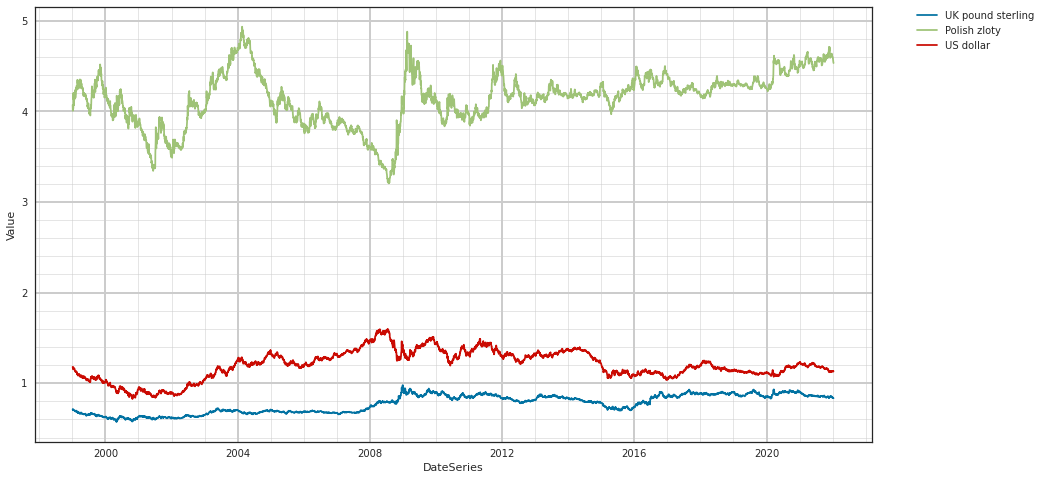

In [24]:
fig = plt.figure(figsize=(15,8))
plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
plt.grid(which='minor', linewidth = 0.5)
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataUSDGBPPNL)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

From graph you can clearly see that 1 GBP was never less expensive than 1 EUR (but 1 USD was).

### Find MAXIMUM and MINIMUM 
* Minimum and maximum for USD (US dollar) over years (sorting descending):

In [25]:
dataUSD = dataUSDGBPPNL.loc[(dataUSDGBPPNL['Currency name'] == 'US dollar')]
dataUSD.set_index('DateSeries', inplace=True)
print('------USD: 5 largest values by dates------')
print(dataUSD['Value'].nlargest().sort_values(ascending = False))
print('------USD: 5 smallest values by dates-----')
print(dataUSD['Value'].nsmallest().sort_values(ascending = False))

------USD: 5 largest values by dates------
DateSeries
2008-07-15    1.5990
2008-04-23    1.5940
2008-04-22    1.5931
2008-04-16    1.5928
2008-07-22    1.5919
Name: Value, dtype: float64
------USD: 5 smallest values by dates-----
DateSeries
2001-07-06    0.8384
2000-10-23    0.8377
2000-10-27    0.8324
2000-10-25    0.8307
2000-10-26    0.8252
Name: Value, dtype: float64


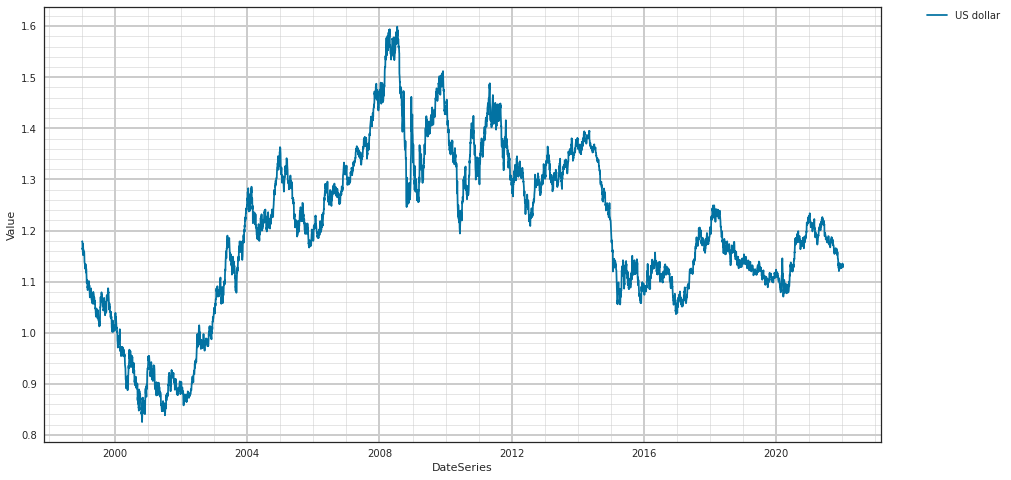

In [26]:
fig = plt.figure(figsize=(15,8))

plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
plt.grid(which='minor', linewidth = 0.5)
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataUSD)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

* Minimum and maximum for GBP (UK pound sterling) over years (sorting descending):

In [27]:
dataGBP = dataUSDGBPPNL.loc[(dataUSDGBPPNL['Currency name'] == 'UK pound sterling')]
dataGBP.set_index('DateSeries', inplace=True)
print('------GBP: 5 largest values by dates------')
print(dataGBP['Value'].nlargest().sort_values(ascending = False))
print('------GBP: 5 smallest values by dates-----')
print(dataGBP['Value'].nsmallest().sort_values(ascending = False))

------GBP: 5 largest values by dates------
DateSeries
2008-12-29    0.97855
2008-12-30    0.97420
2009-01-02    0.96100
2008-12-31    0.95250
2008-12-18    0.95090
Name: Value, dtype: float64
------GBP: 5 smallest values by dates-----
DateSeries
2000-04-28    0.5794
2000-10-25    0.5771
2000-10-24    0.5770
2000-10-23    0.5760
2000-05-03    0.5711
Name: Value, dtype: float64


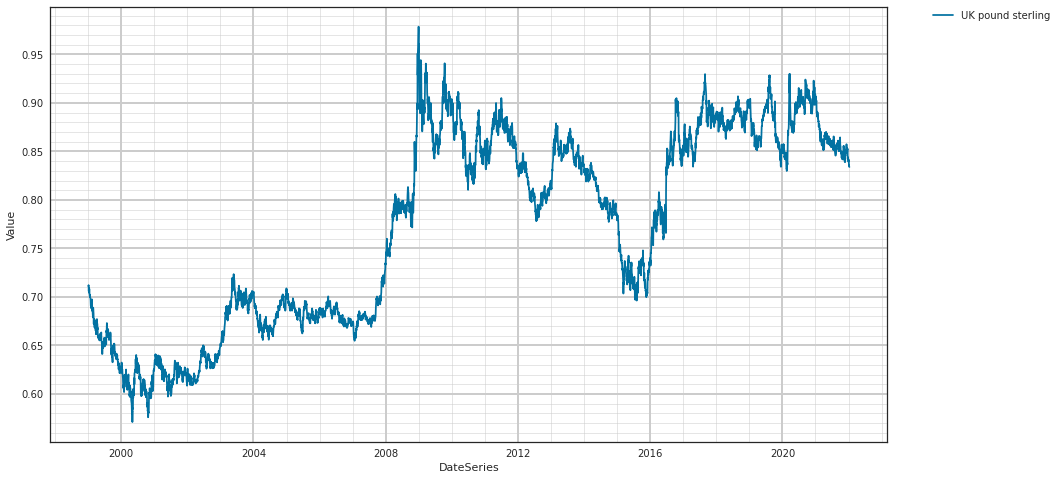

In [28]:
fig = plt.figure(figsize=(15,8))

plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
plt.grid(which='minor', linewidth = 0.5)
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataGBP)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

* Minimum and maximum for PNL (Polish Zloty) over years (sorting descending):

In [29]:
dataPNL = dataUSDGBPPNL.loc[(dataUSDGBPPNL['Currency name'] == 'Polish zloty')]
dataPNL.set_index('DateSeries', inplace=True)
print('------PNL: 5 largest values by dates------')
print(dataPNL['Value'].nlargest().sort_values(ascending = False))
print('------PNL: 5 smallest values by dates-----')
print(dataPNL['Value'].nsmallest().sort_values(ascending = False))

------PNL: 5 largest values by dates------
DateSeries
2004-02-20    4.9346
2004-02-19    4.8986
2004-03-01    4.8944
2004-02-18    4.8899
2004-02-23    4.8854
Name: Value, dtype: float64
------PNL: 5 smallest values by dates-----
DateSeries
2008-08-04    3.2131
2008-07-25    3.2080
2008-07-29    3.2067
2008-07-31    3.2063
2008-07-28    3.2053
Name: Value, dtype: float64


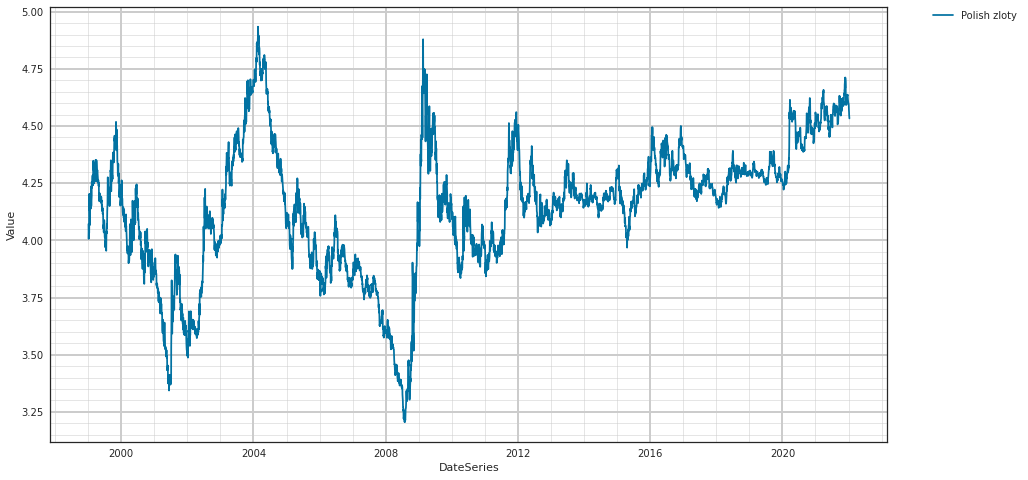

In [30]:
fig = plt.figure(figsize=(15,8))

plt.grid(which='major', linewidth = 2)
plt.minorticks_on()
plt.grid(which='minor', linewidth = 0.5)
sns.lineplot(x='DateSeries', y='Value', hue='Currency name', data = dataPNL)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Inspired by the notebook STARTER: EURO currency 1999-2022 + USD and GBP ex by DARIA CHEMKAEVA - https://www.kaggle.com/lsind18/starter-euro-currency-1999-2022-usd-and-gbp-ex

---
# Trend Analysis on Euro and Polish Zloty 
Now we'll generate a line plot to visualize the evolution of the euro-PNL exchange rate trends

In [31]:
PNL_df

,time,PNL
0,1999-01-04,4.0712
1,1999-01-05,4.0245
2,1999-01-06,4.0065
3,1999-01-07,4.0165
4,1999-01-08,4.0363
...,...,...
5953,2022-01-04,4.5667
5954,2022-01-05,4.5666
5955,2022-01-06,4.5614
5956,2022-01-07,4.5496


<AxesSubplot:>

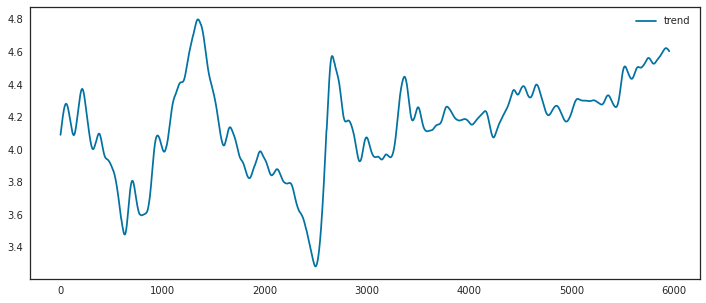

In [32]:
from statsmodels.tsa.filters.hp_filter import hpfilter
price_cycle, price_trend = hpfilter(PNL_df['PNL'], lamb = 129600)
PNL_df['trend'] = price_trend
PNL_df[['trend', 'PNL']].plot(figsize=(12,5))

The resulting figure has many wiggles representing the daily variation of the exchange rate. However, we are only interested in long term variation so next we are going to apply rolling mean with rolling window of 30 days showing variation of exchange rate every 30 days.

In [33]:
PNL_df['rolling_mean_30'] = PNL_df.PNL.rolling(30).mean()

# Test
PNL_df.tail()

,time,PNL,trend,rolling_mean_30
5953,2022-01-04,4.5667,4.606949,4.622953
5954,2022-01-05,4.5666,4.606062,4.619167
5955,2022-01-06,4.5614,4.605172,4.615677
5956,2022-01-07,4.5496,4.604280,4.610273
5957,2022-01-10,4.5334,4.603388,4.604847


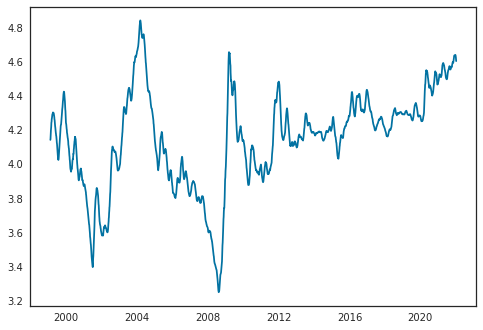

In [34]:
# Replot vs rolling mean
fig, ax = plt.subplots()
ax.plot(PNL_df.time, PNL_df.rolling_mean_30)

# Producing our story

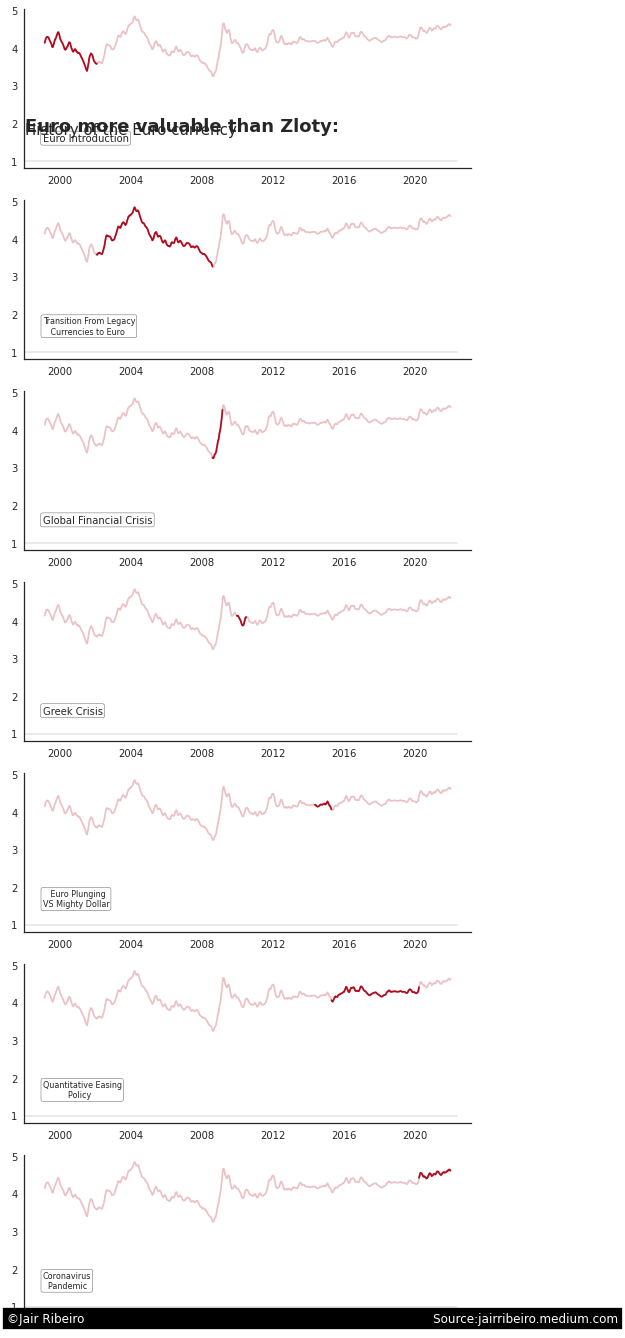

In [35]:
# Generating figure
fig , axs = plt.subplots(7,1,figsize=(8,24))

# Initializing our figures parameters
starts=[0, 782, 2455, 2807, 3935, 4175, 5440]
ends =[782, 2455, 2600, 2940, 4175, 5440, -1]
wys = [1.53, 1.48, 1.53, 1.53, 1.48, 1.48, 1.48]
texts = ['Euro Introduction', 'Transition From Legacy\n   Currencies to Euro', 'Global Financial Crisis',
       'Greek Crisis', '   Euro Plunging\nVS Mighty Dollar', 'Quantitative Easing\n          Policy',
       'Coronavirus\n  Pandemic']
sizes=[10, 8, 10, 10, 8, 8, 8]

# looping over figures
for start, end, wy, text, size, ax in zip(starts, ends, wys, texts, sizes, axs):
    # Background figure
    ax.plot(PNL_df.time, PNL_df.rolling_mean_30, color='#b00b1e', alpha=0.25)
    ax.axhline(y=1, color='#898989', alpha=0.2, xmax=0.97)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(left=False)
    
    # Foreground figure
    ax.plot(PNL_df.time[start:end], PNL_df.rolling_mean_30[start:end], color='#b00b1e')
    ax.text(x=datetime.strptime('1999', '%Y'), y=wy, s=text, size=size,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.2'))
    
# Title & subtitle
axs[0].text(x=datetime.strptime('1998', '%Y'), y=1.8, s='Euro more valuable than Zloty:', weight='bold', size=18)
axs[0].text(x=datetime.strptime('1998', '%Y'), y=1.71, s='History of the Euro currency', size=15)

# Signature
axs[6].text(x=datetime.strptime('1997', '%Y'), y=0.59, s='©Jair Ribeiro'+' '*90+'Source:jairribeiro.medium.com',
            backgroundcolor='#000000', color='#ffffff');

The figure above is too long and might be annoying for some readers, Next we are going to generate an animated GIF that summarizes all of the above figures.

In [36]:
# Initialize plot and animation camera
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))
camera = Camera(fig1)

# Looping over figures as above
for start, end, wy, text, size in zip(starts, ends, wys, texts, sizes):
    for i in range(0,5):
        # Main still figure
        ax1.plot(PNL_df.time, PNL_df.rolling_mean_30, color='#b00b1e')
        ax1.axhline(y=1, color='#898989', alpha=0.4, xmax=0.97)
        #ax1.text(x=datetime.strptime('2007', '%Y'), y=1.02, s='Euro stronger ↑', color='#898989')
        #ax1.text(x=datetime.strptime('2007', '%Y'), y=0.96, s='Zloty stronger ↓', color='#898989')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.tick_params(left=False)
        ax1.set_ylabel('Eur / PNL')
    
        ax2.plot(PNL_df.time, PNL_df.rolling_mean_30, color='#b00b1e', alpha=0.25)
        ax2.axhline(y=1, color='#898989', alpha=0.2, xmax=0.97)
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.tick_params(left=False)
        
        # Title
        ax1.text(x=datetime.strptime('1998', '%Y'), y=1.65, s='History of the Euro currency', size=15)
        
        # Signature
        axs[6].text(x=datetime.strptime('1997', '%Y'), y=0.59, s='©Jair Ribeiro'+' '*90+'Source:jairribeiro.medium.com',
            backgroundcolor='#000000', color='#ffffff');

        # Dynamic figure
        ax2.plot(PNL_df.time[start:end], PNL_df.rolling_mean_30[start:end], color='#b00b1e')
        ax2.text(x=datetime.strptime('1999', '%Y'), y=wy, s=text, size=size, bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))
        camera.snap()
    
# Compile & save animation
animation = camera.animate()
animation.save('euro_hist.gif')

# Clear figure
plt.clf()

# Display saved GIF
Image(url='euro_hist.gif')

<Figure size 1008x576 with 0 Axes>

# Visualizing the variations of Euro-PNL Currency During the Pandemic

Inspired by the code by HUSSAIN ALI NAQVI: https://www.kaggle.com/hussainalinaqvi/visualizing-euro-usd-currency-during-the-pandemic

In [37]:
exchange_rates = PNL_df

exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])
exchange_rates.sort_values('time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,time,PNL,trend,rolling_mean_30
0,1999-01-04,4.0712,4.089802,NaN
1,1999-01-05,4.0245,4.094993,NaN
2,1999-01-06,4.0065,4.100184,NaN
3,1999-01-07,4.0165,4.105374,NaN
4,1999-01-08,4.0363,4.110561,NaN


In [38]:
#lets calculate the MEAN

In [39]:
euro_to_pnl = PNL_df[PNL_df['PNL'] != '-']
euro_to_pnl['PNL'] = euro_to_pnl['PNL'].astype(float)
euro_to_pnl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5895
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             5896 non-null   datetime64[ns]
 1   PNL              5896 non-null   float64       
 2   trend            5896 non-null   float64       
 3   rolling_mean_30  5867 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 230.3 KB


In [40]:
euro_to_pnl['rolling_mean'] = euro_to_pnl['PNL'].rolling(30).mean()
euro_to_pnl

,time,PNL,trend,rolling_mean_30,rolling_mean
0,1999-01-04,4.0712,4.089802,NaN,NaN
1,1999-01-05,4.0245,4.094993,NaN,NaN
2,1999-01-06,4.0065,4.100184,NaN,NaN
3,1999-01-07,4.0165,4.105374,NaN,NaN
4,1999-01-08,4.0363,4.110561,NaN,NaN
...,...,...,...,...,...
5891,2022-01-04,4.5667,4.606949,4.622953,4.622953
5892,2022-01-05,4.5666,4.606062,4.619167,4.619167
5893,2022-01-06,4.5614,4.605172,4.615677,4.615677
5894,2022-01-07,4.5496,4.604280,4.610273,4.610273


Let's compare how the value of the dollar changed during the COVID-19 pandemic.



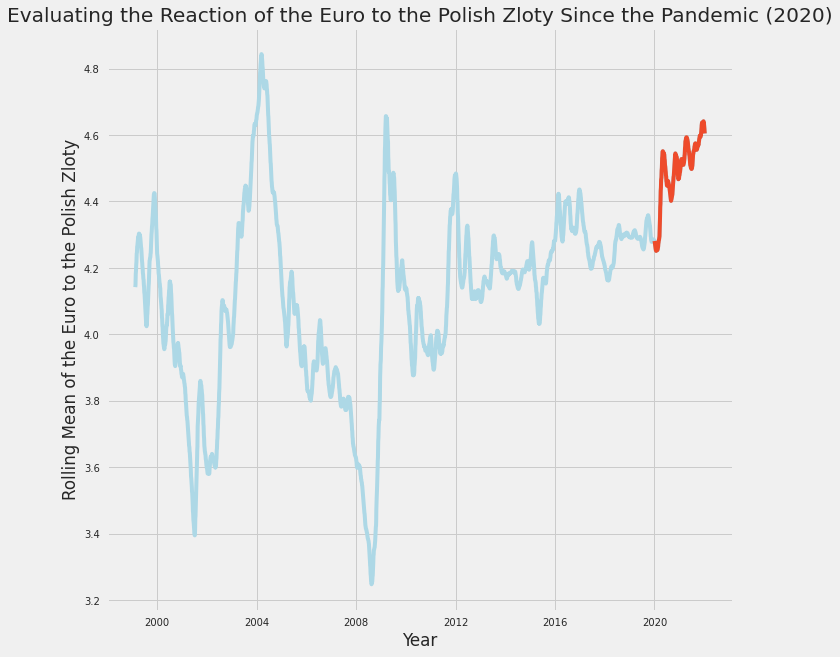

In [41]:
style.use('fivethirtyeight')
pandemic=euro_to_pnl.copy()[euro_to_pnl['time'].dt.year>=2020]

fig,ax=plt.subplots(figsize=(10,10))
ax.plot(euro_to_pnl['time'],euro_to_pnl['rolling_mean'],color='#ADD8E6')
ax.plot(pandemic['time'],pandemic['rolling_mean'],color='#EE4B2B')
ax.set_xlabel('Year')
ax.set_ylabel('Rolling Mean of the Euro to the Polish Zloty')
ax.set_title('Evaluating the Reaction of the Euro to the Polish Zloty Since the Pandemic (2020)')

plt.show()

# EUR/PNL Exchange Prediction

A Time Series is a sequence of data points indexed in time order. The time intervals can be daily, monthly, or even yearly.

Below is an example of a Time Series that depicts the evolution of money exchanges between EURO and the Polish zloty (I live in Poland, so I chose the zloty as the currency for this experiment) each day from 1999 to 2022.

## Forecasting Time Series
Time series forecasting is the practice of predicting future values of a time series based on past results using a statistical model.

### Some Examples of Applications

To forecast the amount of new or churning customers.
To explain seasonal sales patterns.
Detecting uncommon events and estimating the size of their impact
Estimate the impact of a newly launched product on the number of units sold.

In [42]:
data0=pd.read_csv('../input/euro-exchange-daily-rates-19992020/euro-daily-hist_1999_2022.csv', parse_dates = True, encoding = 'utf8')
data0.head()


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-01-10,1.5774,1.9558,6.3969,1.4327,1.0446,7.2128,NaN,24.357,7.4381,NaN,0.83398,NaN,8.8233,7.5278,358.40,16181.90,3.5303,83.8000,146.2,130.45,1355.68,NaN,NaN,NaN,23.0597,4.7536,10.0253,1.6753,58.141,4.5334,4.9449,84.9825,10.3038,1.5344,NaN,NaN,38.0740,15.7183,1.1318,17.6999
1,2022-01-07,1.5804,1.9558,6.4343,1.4374,1.0422,7.2060,NaN,24.439,7.4380,NaN,0.83430,NaN,8.8133,7.5214,358.68,16188.43,3.5135,83.9780,146.0,130.90,1359.96,NaN,NaN,NaN,23.1109,4.7553,10.0288,1.6748,58.046,4.5496,4.9451,85.2980,10.2839,1.5356,NaN,NaN,38.0740,15.7206,1.1298,17.6701
2,2022-01-06,1.5778,1.9558,6.4420,1.4451,1.0395,7.2187,NaN,24.528,7.4393,NaN,0.83593,NaN,8.8272,7.5197,359.84,16291.88,3.5247,84.2475,146.8,131.05,1362.06,NaN,NaN,NaN,23.2549,4.7670,10.0350,1.6752,57.943,4.5614,4.9435,86.5088,10.3265,1.5388,NaN,NaN,37.9620,15.5504,1.1315,17.7932
3,2022-01-05,1.5600,1.9558,6.4146,1.4399,1.0364,7.2087,NaN,24.581,7.4384,NaN,0.83546,NaN,8.8227,7.5190,362.15,16263.02,3.4989,84.1610,146.8,131.03,1354.61,NaN,NaN,NaN,23.1422,4.7466,9.9672,1.6597,57.713,4.5666,4.9460,85.7275,10.2545,1.5340,NaN,NaN,37.6070,15.2446,1.1319,17.9369
4,2022-01-04,1.5682,1.9558,6.4174,1.4382,1.0355,7.1924,NaN,24.745,7.4378,NaN,0.83618,NaN,8.7919,7.5185,365.12,16199.73,3.4909,84.2055,147.8,131.17,1352.91,NaN,NaN,NaN,23.1808,4.7214,10.0138,1.6668,57.988,4.5667,4.9481,84.9202,10.2808,1.5310,NaN,NaN,37.5820,15.1384,1.1279,18.1080


In [43]:
data0 = data0.dropna(axis=1)
data0

,Period\Unit:,[Australian dollar ],[Canadian dollar ],[Swiss franc ],[Czech koruna ],[Danish krone ],[UK pound sterling ],[Hong Kong dollar ],[Hungarian forint ],[Indonesian rupiah ],[Japanese yen ],[Korean won ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Thai baht ],[US dollar ],[South African rand ]
0,2022-01-10,1.5774,1.4327,1.0446,24.357,7.4381,0.83398,8.8233,358.40,16181.90,130.45,1355.68,23.0597,4.7536,10.0253,1.6753,58.141,4.5334,84.9825,10.3038,1.5344,38.0740,1.1318,17.6999
1,2022-01-07,1.5804,1.4374,1.0422,24.439,7.4380,0.83430,8.8133,358.68,16188.43,130.90,1359.96,23.1109,4.7553,10.0288,1.6748,58.046,4.5496,85.2980,10.2839,1.5356,38.0740,1.1298,17.6701
2,2022-01-06,1.5778,1.4451,1.0395,24.528,7.4393,0.83593,8.8272,359.84,16291.88,131.05,1362.06,23.2549,4.7670,10.0350,1.6752,57.943,4.5614,86.5088,10.3265,1.5388,37.9620,1.1315,17.7932
3,2022-01-05,1.5600,1.4399,1.0364,24.581,7.4384,0.83546,8.8227,362.15,16263.02,131.03,1354.61,23.1422,4.7466,9.9672,1.6597,57.713,4.5666,85.7275,10.2545,1.5340,37.6070,1.1319,17.9369
4,2022-01-04,1.5682,1.4382,1.0355,24.745,7.4378,0.83618,8.7919,365.12,16199.73,131.17,1352.91,23.1808,4.7214,10.0138,1.6668,57.988,4.5667,84.9202,10.2808,1.5310,37.5820,1.1279,18.1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,1999-01-08,1.8406,1.7643,1.6138,34.938,7.4433,0.70940,9.0302,250.15,9321.63,130.09,1366.73,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,27.2075,9.1650,1.9537,42.5590,1.1659,6.7855
5954,1999-01-07,1.8474,1.7602,1.6165,34.886,7.4431,0.70585,9.0131,250.09,9218.77,129.43,1337.16,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,26.9876,9.1800,1.9436,42.1678,1.1632,6.8283
5955,1999-01-06,1.8820,1.7711,1.6116,34.850,7.4452,0.70760,9.1010,250.67,9337.68,131.42,1359.54,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,27.4315,9.3050,1.9699,42.6949,1.1743,6.7307
5956,1999-01-05,1.8944,1.7965,1.6123,34.917,7.4495,0.71220,9.1341,250.80,9314.51,130.96,1373.01,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,26.5876,9.4025,1.9655,42.5048,1.1790,6.7975


In [44]:
data1=data0[['Period\\Unit:','[Polish zloty ]']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Period\Unit:     5958 non-null   object
 1   [Polish zloty ]  5958 non-null   object
dtypes: object(2)
memory usage: 93.2+ KB


In [45]:
data1.columns=['Date','EUR/PNL']

In [46]:
drop=[]
EURO=[]
for i,item in enumerate(data1['EUR/PNL']):
    if item=='-':
        drop+=[i]
    else:
        EURO+=[float(item)]

In [47]:
data1=data1.drop(index=drop)
data1['EUR/PNL']=EURO
data1

,Date,EUR/PNL
0,2022-01-10,4.5334
1,2022-01-07,4.5496
2,2022-01-06,4.5614
3,2022-01-05,4.5666
4,2022-01-04,4.5667
...,...,...
5953,1999-01-08,4.0363
5954,1999-01-07,4.0165
5955,1999-01-06,4.0065
5956,1999-01-05,4.0245


In [48]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     5896 non-null   datetime64[ns]
 1   EUR/PNL  5896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 138.2 KB


In [49]:
tdi = pd.DatetimeIndex(data1.Date)
data1.set_index(tdi, inplace=True)
data1.drop(columns='Date', inplace=True)
data1.index.name = 'Date'

In [50]:
data1

,EUR/PNL
Date,
2022-01-10,4.5334
2022-01-07,4.5496
2022-01-06,4.5614
2022-01-05,4.5666
2022-01-04,4.5667
...,...
1999-01-08,4.0363
1999-01-07,4.0165
1999-01-06,4.0065


In [51]:
 
# Read the exchange data
pnl_predictions = data1

# Print the first five rows of the dataset
pnl_predictions.head() 



,EUR/PNL
Date,
2022-01-10,4.5334
2022-01-07,4.5496
2022-01-06,4.5614
2022-01-05,4.5666
2022-01-04,4.5667


In [52]:
df_test = pnl_predictions
#tdi = pd.DatetimeIndex(pnl_predictions.Date)
#df_test.set_index(tdi, inplace=True)
#df_test.drop(columns='Date', inplace=True)
df_test.index.name = 'datetimeindex'

df_test = df_test.explode('EUR/PNL') 
sizes = df_test.groupby(level=0)['EUR/PNL'].transform('size').sub(1)
#duration = df_test['duration_sec'].div(sizes)
df_test.index += pd.to_timedelta(df_test.groupby(level=0).cumcount()) 




In [53]:
df_test

,EUR/PNL
2022-01-10,4.5334
2022-01-07,4.5496
2022-01-06,4.5614
2022-01-05,4.5666
2022-01-04,4.5667
...,...
1999-01-08,4.0363
1999-01-07,4.0165
1999-01-06,4.0065
1999-01-05,4.0245


In [54]:
pnl_predictions= df_test
pnl_predictions

,EUR/PNL
2022-01-10,4.5334
2022-01-07,4.5496
2022-01-06,4.5614
2022-01-05,4.5666
2022-01-04,4.5667
...,...
1999-01-08,4.0363
1999-01-07,4.0165
1999-01-06,4.0065
1999-01-05,4.0245


In [55]:
data1

,EUR/PNL
datetimeindex,
2022-01-10,4.5334
2022-01-07,4.5496
2022-01-06,4.5614
2022-01-05,4.5666
2022-01-04,4.5667
...,...
1999-01-08,4.0363
1999-01-07,4.0165
1999-01-06,4.0065


In [56]:
# Split data into train / test sets

train = data1.iloc[:len(pnl_predictions)-1]
train = train.dropna()
print("Training set")
print()
train.info()
test = data1.iloc[len(pnl_predictions)-12:] # set 1 year(12 months) for testing
test = test.dropna()
print("---------------------------------------")
print("Testing set")
print()
test.info()

Training set

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5895 entries, 2022-01-10 to 1999-01-05
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/PNL  5895 non-null   float64
dtypes: float64(1)
memory usage: 92.1 KB
---------------------------------------
Testing set

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1999-01-19 to 1999-01-04
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/PNL  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [57]:
# ETS Decomposition
#result = seasonal_decompose(x=pnl_predictions, model ='multiplicative')
  
# ETS plot 
#result.plot()

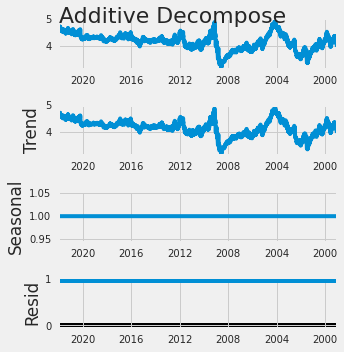

In [58]:
result_add = seasonal_decompose(x=pnl_predictions, model='multiplicative', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [59]:
# ETS Decomposition
#result = seasonal_decompose(pnl_predictions['EUR/PNL'], model ='multiplicative')
  
# ETS plot 
#result.plot()
  

In [60]:

# Fit auto_arima function to EUR/PNL dataset
stepwise_fit = auto_arima(pnl_predictions['EUR/PNL'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = False,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-27731.100, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-27733.661, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-27733.238, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-27733.324, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-27735.592, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.882 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5896
Model:               SARIMAX(0, 1, 0)   Log Likelihood               13868.796
Date:                Tue, 25 Jan 2022   AIC                         -27735.592
Time:                        16:28:44   BIC                         -27728.910
Sample:                             0   HQIC                        -27733.270
                               - 5896                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0005   4.74e-06    111.655      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):             10384.24
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               3.53   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Fit ARIMA Model to EUR/PNL dataset

In [61]:
 
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['EUR/PNL'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            EUR/PNL   No. Observations:                 5895
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               13809.371
Date:                            Tue, 25 Jan 2022   AIC                         -27608.742
Time:                                    16:29:20   BIC                         -27575.344
Sample:                                         0   HQIC                        -27597.132
                                           - 5895                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0174      0.007      2.425      0.015       0.003       0.031
ar.S.L12       0.0358      0.009      4.125      0.000       0.019       0.053
ar.S.L24       0.0168      0.009      1.796      0.072      -0.002       0.035
ma.S.L12      -0.9971      0.003   -338.765      0.000      -1.003      -0.991
sigma2         0.0005   4.94e-06    107.479      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9912.82
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.51   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [62]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
#predictions.plot(legend = True)
#test['EUR/PNL'].plot(legend = True)


## Evaluate the model using MSE and RMSE

In [63]:
#Load specific evaluation tools

  
# Calculate root mean squared error
rmse(test["EUR/PNL"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["EUR/PNL"], predictions)

0.007119829493986876

## Forecast using ARIMA Model

<AxesSubplot:>

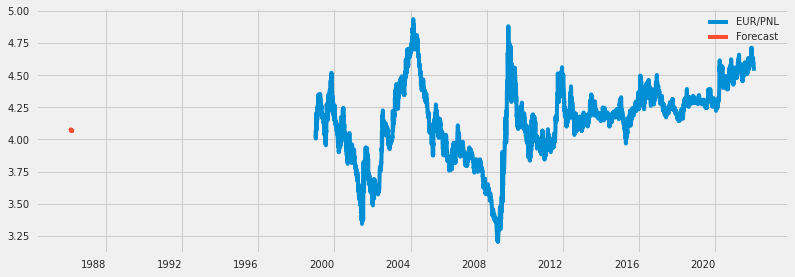

In [64]:
# Train the model on the full dataset
model = model = SARIMAX(pnl_predictions['EUR/PNL'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(train)+1, 
                          end = (len(train)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
pnl_predictions['EUR/PNL'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

## Other options

In [65]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
#predictions.plot(legend = True)
#test['EUR/PNL'].plot(legend = True)

In [66]:

  
# Calculate root mean squared error
rmse(test["EUR/PNL"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["EUR/PNL"], predictions)

0.004599781776272528

<AxesSubplot:xlabel='datetimeindex'>

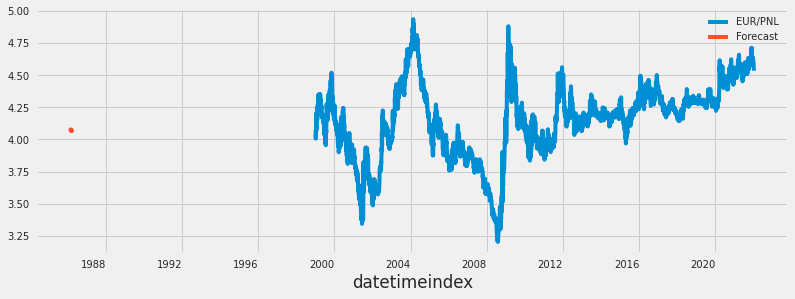

In [67]:
# Train the model on the full dataset
model = model = SARIMAX(data1['EUR/PNL'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(data1)+1, 
                          end = (len(data1)-1) + 2 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
data1['EUR/PNL'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5896 entries, 2022-01-10 to 1999-01-04
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/PNL  5896 non-null   float64
dtypes: float64(1)
memory usage: 92.1 KB


In [69]:
#data1.index = pd.DatetimeIndex(data1["Date"])
#data1.drop(["Date"],axis=1,inplace=True)
#data1

In [70]:
data1 = data1.asfreq('d')
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8408 entries, 1999-01-04 to 2022-01-10
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/PNL  5896 non-null   float64
dtypes: float64(1)
memory usage: 131.4 KB


In [71]:
data2=data1.fillna(method='ffill')
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8408 entries, 1999-01-04 to 2022-01-10
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/PNL  8408 non-null   float64
dtypes: float64(1)
memory usage: 131.4 KB


In [72]:
# data must be univariate
data=data2['EUR/PNL']
print(type(data))
data

<class 'pandas.core.series.Series'>


datetimeindex
1999-01-04    4.0712
1999-01-05    4.0245
1999-01-06    4.0065
1999-01-07    4.0165
1999-01-08    4.0363
               ...  
2022-01-06    4.5614
2022-01-07    4.5496
2022-01-08    4.5496
2022-01-09    4.5496
2022-01-10    4.5334
Freq: D, Name: EUR/PNL, Length: 8408, dtype: float64

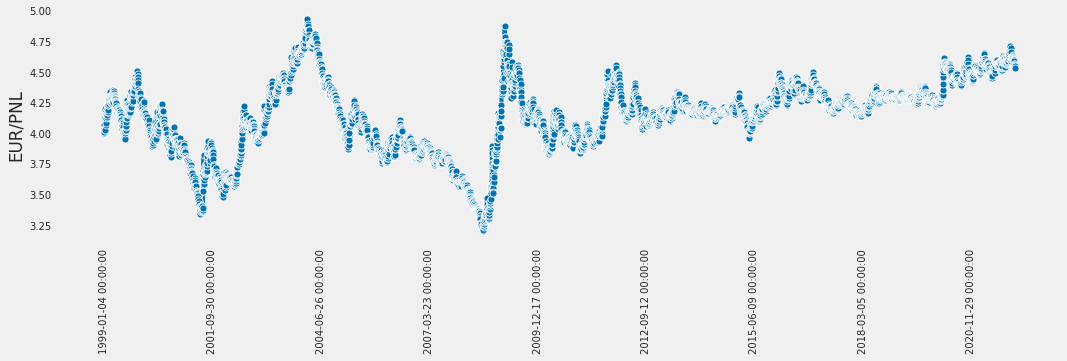

In [73]:
# plot_series
_ =plot_series(data)
plt.xticks(rotation=90)
plt.grid()

In [74]:
#TimeSeriesExperiment from pycarat
exp = TimeSeriesExperiment()
exp.setup(data=data,session_id=42,fh=36)

,Description,Value
0,session_id,42
1,Original Data,"(8408, 1)"
2,Missing Values,False
3,Transformed Train Set,"(8372,)"
4,Transformed Test Set,"(36,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [75]:
#ARIMA
model = exp.create_model("arima")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-08-19,0.0295,0.0361,0.0065,0.0065,0.8462,-0.0635
1,2021-09-24,0.0300,0.0373,0.0065,0.0065,0.8594,-2.1969
2,2021-10-30,0.0348,0.0414,0.0075,0.0075,0.9991,-0.0372
Mean,NaT,0.0314,0.0383,0.0068,0.0068,0.9016,-0.7659
SD,NaT,0.0024,0.0023,0.0005,0.0005,0.0692,1.0120


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [76]:
y_train = exp.get_config("y_train")
y_train[5:]

1999-01-09    4.0363
1999-01-10    4.0363
1999-01-11    4.0320
1999-01-12    4.0330
1999-01-13    4.2033
               ...  
2021-12-01    4.6283
2021-12-02    4.5953
2021-12-03    4.5923
2021-12-04    4.5923
2021-12-05    4.5923
Freq: D, Name: EUR/PNL, Length: 8367, dtype: float64

In [77]:
y_predict = exp.predict_model(model)
#_=plot_series(y_predict, y_train, y_predict, y_pred_future, labels=['All','Train','Test Predictions','Future Prediciton'])
#plt.grid()

# Plot the forecast values
#data1['EUR/PNL'].plot(figsize = (12, 5), legend = True)
#y_predict.plot(legend = True)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,ARIMA,0.0623,0.0692,0.0135,0.0136,1.7875,-5.1461


In [78]:
#SMAPE
tuned_model = exp.tune_model(model,optimize = 'SMAPE')
tuned_model

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-08-19,0.0312,0.0411,0.0069,0.0068,0.8938,-0.3805
1,2021-09-24,0.0189,0.0230,0.0041,0.0041,0.5420,-0.2083
2,2021-10-30,0.0370,0.0456,0.0079,0.0080,1.0620,-0.2589
Mean,NaT,0.0290,0.0366,0.0063,0.0063,0.8326,-0.2826
SD,NaT,0.0075,0.0098,0.0016,0.0016,0.2166,0.0722


ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=False)

In [79]:
exp.predict_model(tuned_model)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,ARIMA,0.0253,0.0297,0.0055,0.0055,0.7246,-0.1322


2021-12-06    4.5923
2021-12-07    4.5923
2021-12-08    4.5923
2021-12-09    4.5923
2021-12-10    4.5923
2021-12-11    4.5923
2021-12-12    4.5923
2021-12-13    4.5923
2021-12-14    4.5923
2021-12-15    4.5923
2021-12-16    4.5923
2021-12-17    4.5923
2021-12-18    4.5923
2021-12-19    4.5923
2021-12-20    4.5923
2021-12-21    4.5923
2021-12-22    4.5923
2021-12-23    4.5923
2021-12-24    4.5923
2021-12-25    4.5923
2021-12-26    4.5923
2021-12-27    4.5923
2021-12-28    4.5923
2021-12-29    4.5923
2021-12-30    4.5923
2021-12-31    4.5923
2022-01-01    4.5923
2022-01-02    4.5923
2022-01-03    4.5923
2022-01-04    4.5923
2022-01-05    4.5923
2022-01-06    4.5923
2022-01-07    4.5923
2022-01-08    4.5923
2022-01-09    4.5923
2022-01-10    4.5923
Freq: D, Name: EUR/PNL, dtype: float64

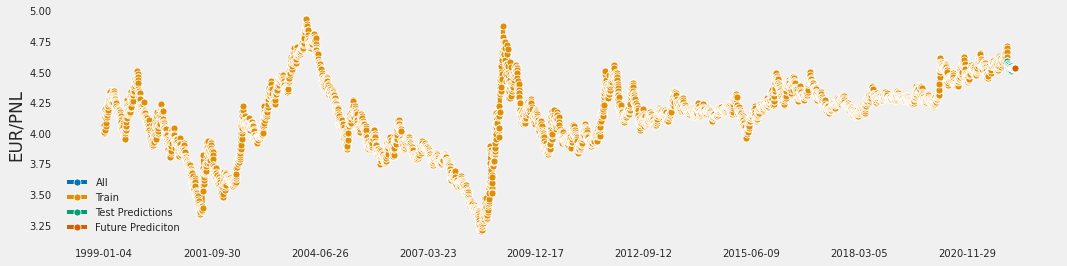

In [80]:
# y_pred_future for Future Prediciton
final_model = exp.finalize_model(tuned_model)
y_pred_future = exp.predict_model(final_model, verbose=False)

_=plot_series(y_pred_future, y_train, y_predict, y_pred_future, labels=['All','Train','Test Predictions','Future Prediciton'])
plt.grid()



In [81]:
exp.predict_model(final_model)

2022-01-11    4.533
2022-01-12    4.533
2022-01-13    4.533
2022-01-14    4.533
2022-01-15    4.533
2022-01-16    4.533
2022-01-17    4.533
2022-01-18    4.533
2022-01-19    4.533
2022-01-20    4.533
2022-01-21    4.533
2022-01-22    4.533
2022-01-23    4.533
2022-01-24    4.533
2022-01-25    4.533
2022-01-26    4.533
2022-01-27    4.533
2022-01-28    4.533
2022-01-29    4.533
2022-01-30    4.533
2022-01-31    4.533
2022-02-01    4.533
2022-02-02    4.533
2022-02-03    4.533
2022-02-04    4.533
2022-02-05    4.533
2022-02-06    4.533
2022-02-07    4.533
2022-02-08    4.533
2022-02-09    4.533
2022-02-10    4.533
2022-02-11    4.533
2022-02-12    4.533
2022-02-13    4.533
2022-02-14    4.533
2022-02-15    4.533
Freq: D, Name: EUR/PNL, dtype: float64

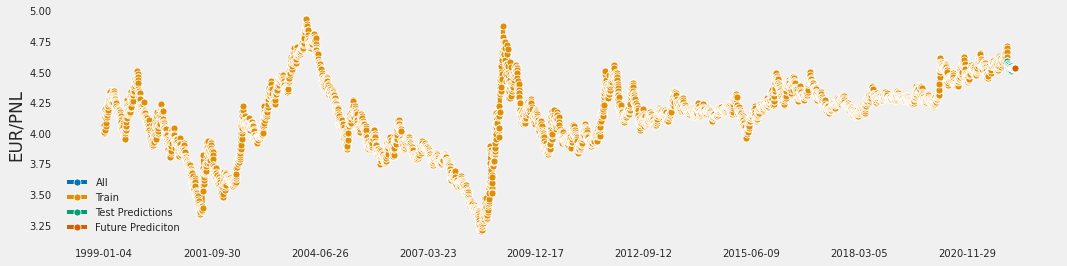

In [82]:
# y_pred_future for Future Prediciton
final_model = exp.finalize_model(tuned_model)
y_pred_future = exp.predict_model(final_model, verbose=False)

_=plot_series(y_pred_future, y_train, y_predict, y_pred_future, labels=['All','Train','Test Predictions','Future Prediciton'])
plt.grid()

Official Rates for january:

* Date				        Euro to Polish Zloty
* Thursday 20 January 2022	1 EUR = 4.5259 PLN
* Wednesday 19 January 2022	1 EUR = 4.5222 PLN
* Tuesday 18 January 2022		1 EUR = 4.5371 PLN
* Monday 17 January 2022		1 EUR = 4.5260 PLN
* Sunday 16 January 2022		1 EUR = 4.5378 PLN
* Saturday 15 January 2022	1 EUR = 4.5390 PLN
* Friday 14 January 2022		1 EUR = 4.5386 PLN
* Thursday 13 January 2022	1 EUR = 4.5409 PLN
* Wednesday 12 January 2022	1 EUR = 4.5259 PLN
* Tuesday 11 January 2022		1 EUR = 4.5372 PLN
* Monday 10 January 2022		1 EUR = 4.5404 PLN
* Sunday 9 January 2022		1 EUR = 4.5464 PLN
* Saturday 8 January 2022		1 EUR = 4.5449 PLN
* Friday 7 January 2022		1 EUR = 4.5457 PLN
* Thursday 6 January 2022		1 EUR = 4.5544 PLN
* Wednesday 5 January 2022	1 EUR = 4.5738 PLN
* Tuesday 4 January 2022		1 EUR = 4.5653 PLN
* Monday 3 January 2022		1 EUR = 4.5762 PLN
* Sunday 2 January 2022		1 EUR = 4.5885 PLN
* Saturday 1 January 2022		1 EUR = 4.5897 PLN

Inspired by the notebook: EUR/USD Exchange Prediction Pycaret by STPETE_ISHII - https://www.kaggle.com/stpeteishii/eur-usd-exchange-prediction-pycaret

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 8372
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 7)   Log Likelihood               18389.071
Date:                           Tue, 25 Jan 2022   AIC                         -36772.142
Time:                                   16:32:10   BIC                         -36751.047
Sample:                                        0   HQIC                        -36764.937
                                          - 8372                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.435e-05      0.000      0.214      0.830      -0.001       0.001
ar.L1          0.8413      0.003    269.180      0.000       0.835       0.847
sigma2         0.0007   4.52e-06    159.474      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  94.98   Jarque-Bera (JB):             38055.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""